<a href="https://colab.research.google.com/github/felipegallegos1/portafolio/blob/etapa-3/etapa_3_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Felipe Gallegos / 21143261-6

José Maldonado / 20886828-4

## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


In [3]:
%pip install wbgapi

In [4]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/EXAMEN')

import my_func as fn

Mounted at /content/drive


In [5]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [6]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [7]:
df_wb_raw.to_csv('wb_raw.csv', index=False)

In [8]:
from google.colab import files
files.download('wb_raw.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [10]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [11]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [12]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

In [13]:
#@title Cargar base de datos.
import pandas as pd

df = df_wb_raw.copy()
df.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


In [14]:
#@title Número de países.
n_paises = df['country'].nunique()
print("Número de países:", n_paises)

Número de países: 198


In [15]:
print("N° de años: 1 (dataset descargado para un año específico: 2023)")

N° de años: 1 (dataset descargado para un año específico: 2023)


In [16]:
#@title Número total de observaciones
n_obs = df.shape[0]
print("Número total de observaciones:", n_obs)

Número total de observaciones: 198


In [17]:
#@title Número total de variables
n_vars = df.shape[1]
print("Número total de variables:", n_vars)


Número total de variables: 67


In [18]:
#@title Porcentaje de valores faltantes por variable
missing_pct = df.isna().mean() * 100

missing_df = (
    missing_pct
    .reset_index()
    .rename(columns={'index': 'variable', 0: 'missing_pct'})
    .sort_values(by='missing_pct', ascending=False)
)

missing_df.head(10)
# Lo convertimos en un DataFrame para que fuera más fácil la lectura de este y
# lo ordenamos de más NA a menos NA

,variable,missing_pct
50,SE.PRM.NENR.FE,100.000000
51,SE.PRM.NENR.MA,100.000000
49,SE.PRM.NENR,100.000000
24,GC.TAX.EXPT.ZS,83.333333
23,GC.TAX.EXPT.CN,83.333333
47,GC.DOD.TOTL.CN,82.828283
48,GC.DOD.TOTL.GD.ZS,82.828283
64,IT.NET.USER.FE.ZS,71.212121
65,IT.NET.USER.MA.ZS,71.212121
44,EG.ELC.LOSS.ZS,64.646465


In [19]:
#@title Variables que se deben eliminar o imputar
vars_eli = missing_df[missing_df['missing_pct'] > 15]['variable'].tolist()

vars_imp = missing_df[
    (missing_df['missing_pct'] > 0) &
    (missing_df['missing_pct'] <= 15)
]['variable'].tolist()

print("Variables a eliminar (>15% NA):", len(vars_eli))
print("Variables a imputar (≤15% NA):", len(vars_imp))

Variables a eliminar (>15% NA): 26
Variables a imputar (≤15% NA): 24


Las variables con más de un 15% de datos faltantes fueron eliminadas del análisis, mientras que aquellas con una proporción menor fueron imputadas, siguiendo la recomendación metodológica del enunciado.

In [20]:
#@title Eliminamos variables con más de 15% de NA
df_new = df.drop(columns=vars_eli)

print("Variables antes:", df.shape[1])
print("Variables después:", df_new.shape[1])

Variables antes: 67
Variables después: 41


In [21]:
#@title Ahora imputamos las variables con menos de % de NA
df_imp = df_new.copy()

# Imputación por mediana
for var in vars_imp:
    if df_imp[var].dtype != 'object':
        df_imp[var] = df_imp[var].fillna(df_imp[var].median())


In [22]:
#@title Revisamos que no queden NA
df_imp.isna().sum().sort_values(ascending=False).head(10)

,0
country,0
Country,0
NY.GDP.MKTP.PP.KD,0
SP.POP.GROW,0
SP.POP.TOTL,0
SP.POP.TOTL.FE.IN,0
SP.POP.TOTL.FE.ZS,0
SP.POP.TOTL.MA.IN,0
SP.POP.TOTL.MA.ZS,0
SP.URB.GROW,0


In [23]:
print("Total de NA en el dataset:", df_imp.isna().sum().sum())

Total de NA en el dataset: 0


Las variables con una proporción de datos faltantes inferior o igual al 15% fueron imputadas utilizando la mediana de cada variable. Esta decisión se adopta por la robustez de la mediana frente a valores extremos y por tratarse de un conjunto de datos de corte transversal correspondiente a un único año.

### Volvemos a recuperar la base prinicipal para así poder extraer el PIB numerico ya que en un comienzo esta variable se cambio a una variable de categoria.

In [24]:
import pandas as pd

df_raw_num = pd.read_csv("/content/drive/MyDrive/EXAMEN/wb_raw.csv")

df_raw_num["NY.GDP.MKTP.PP.KD"].head()
df_raw_num["NY.GDP.MKTP.PP.KD"].dtype

df_raw_num["PIB_num"] = pd.to_numeric(
    df_raw_num["NY.GDP.MKTP.PP.KD"],
    errors="coerce"
)

df_imp = df_imp.merge(
    df_raw_num[["country", "PIB_num"]],
    on="country",
    how="left"
)

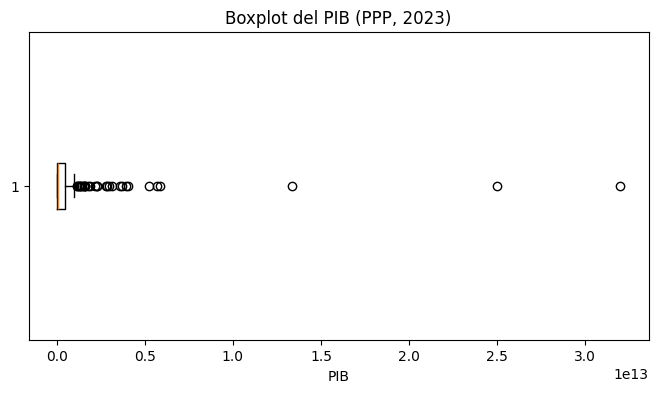

In [25]:
#@title Boxplot del PIB (variable numérica)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.boxplot(df_imp["PIB_num"].dropna(), vert=False)
plt.title("Boxplot del PIB (PPP, 2023)")
plt.xlabel("PIB")
plt.show()

La distribución del PIB presenta una marcada asimetría, reflejando la heterogeneidad entre países, con economías de gran tamaño concentradas en la parte superior de la distribución.

In [26]:
#@title Identificación de outliers con criterio IQR
Q1 = df_imp["PIB_num"].quantile(0.25)
Q3 = df_imp["PIB_num"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_imp[
    (df_imp["PIB_num"] < lower) | (df_imp["PIB_num"] > upper)
]

print("Número de países outliers:", outliers.shape[0])

Número de países outliers: 30


Mediante el criterio del rango intercuartílico (IQR) se identificaron países con valores extremos de PIB. Estos outliers corresponden a economías de gran tamaño y no a errores de medición, por lo que no fueron eliminados del análisis, ya que reflejan diferencias estructurales reales entre países.

In [27]:
#@title Tabla de estadísticas descriptivas
# Seleccionar variables numéricas
num_vars = df_imp.select_dtypes(include=['int64', 'float64'])

# Tabla descriptiva
desc_stats = num_vars.describe().T[
    ['mean', '50%', 'std', 'min', 'max']
].rename(columns={'50%': 'median'})

desc_stats = desc_stats.round(3)
desc_stats

,mean,median,std,min,max
SP.POP.GROW,1.153000e+00,1.112000e+00,1.576000e+00,-8.423000e+00,6.527000e+00
SP.POP.TOTL,3.999611e+07,7.335048e+06,1.484957e+08,9.816000e+03,1.438070e+09
SP.POP.TOTL.FE.IN,1.987776e+07,3.672054e+06,7.252840e+07,4.795000e+03,6.961863e+08
SP.POP.TOTL.FE.ZS,4.997300e+01,5.032900e+01,2.993000e+00,2.848400e+01,5.492100e+01
SP.POP.TOTL.MA.IN,2.011836e+07,3.560820e+06,7.598056e+07,5.021000e+03,7.418833e+08
SP.POP.TOTL.MA.ZS,5.002700e+01,4.967100e+01,2.993000e+00,4.507900e+01,7.151600e+01
SP.URB.GROW,1.730000e+00,1.525000e+00,1.826000e+00,-8.348000e+00,8.106000e+00
SP.URB.TOTL,2.289674e+07,4.463172e+06,8.019058e+07,6.283000e+03,9.244403e+08
SP.URB.TOTL.IN.ZS,6.220500e+01,6.362300e+01,2.272300e+01,1.505800e+01,1.000000e+02
SL.TLF.TOTL.FE.ZS,4.230000e+01,4.508200e+01,8.493000e+00,6.846000e+00,5.467100e+01


Se generó una tabla de estadísticas descriptivas para las variables numéricas del conjunto de datos limpio, incluyendo media, mediana, desviación estándar, valores mínimo y máximo, con el fin de caracterizar la distribución y magnitud de los indicadores considerados.

In [28]:
import plotly.express as px

fig = px.choropleth(
    df_imp,
    locations="country",        # códigos ISO
    color="PIB_num",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Distribución del PIB (PPP, 2023)"
)

fig.show()


El mapa muestra la distribución geográfica del PIB, evidenciando diferencias significativas entre regiones y niveles de desarrollo económico.

In [29]:
df_imp["NY.GDP.MKTP.PP.KD"] = pd.qcut(
    df_imp["PIB_num"],
    q=5,
    labels=["Low", "Medium-Low", "Medium", "Medium-High", "High"]
)

df_imp["NY.GDP.MKTP.PP.KD"].value_counts()


,count
NY.GDP.MKTP.PP.KD,
Low,40
Medium,40
High,40
Medium-Low,39
Medium-High,39


La variable PIB fue discretizada en cinco categorías utilizando cuantiles, lo que permitió obtener grupos balanceados en términos de número de observaciones, facilitando la posterior etapa de modelación mediante algoritmos de clasificación.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [30]:
#@title Seleccion variables numéricas
df_pca = df_imp.select_dtypes(include=['int64', 'float64'])

# Eliminar PIB numérico y cualquier variable objetivo
df_pca = df_pca.drop(columns=['PIB_num'], errors='ignore')

df_pca.shape


(198, 38)

Se seleccionan exclusivamente variables numéricas explicativas, excluyendo la variable objetivo y los identificadores, dado que el PCA requiere variables cuantitativas y no supervisadas.

In [31]:
#@title Estandarización de las variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)


Las variables fueron estandarizadas para asegurar que todas contribuyan equitativamente a la extracción de componentes, evitando sesgos por diferencias de escala.

In [32]:
#@title Aplicamos PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [33]:
#@title Varianza explicada por componente
import numpy as np
import pandas as pd

var_exp = pca.explained_variance_ratio_
var_exp_cum = np.cumsum(var_exp)

pca_df = pd.DataFrame({
    'Componente': range(1, len(var_exp) + 1),
    'Varianza explicada': var_exp,
    'Varianza acumulada': var_exp_cum
})

pca_df.head(10)


,Componente,Varianza explicada,Varianza acumulada
0,1,0.263110,0.263110
1,2,0.210908,0.474018
2,3,0.109364,0.583382
3,4,0.087478,0.670860
4,5,0.075738,0.746598
5,6,0.044740,0.791338
6,7,0.033765,0.825103
7,8,0.029673,0.854776
8,9,0.028373,0.883149
9,10,0.026002,0.909151


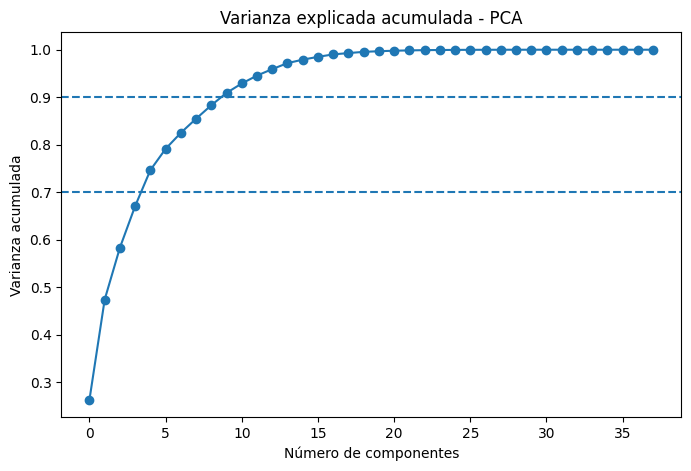

In [34]:
#@title Gráfico de varianza acumulada
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(var_exp_cum, marker='o')
plt.axhline(0.70, linestyle='--')
plt.axhline(0.90, linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada acumulada - PCA')
plt.show()

In [35]:
#@title Elegimos un número de componentes
n_components = 8

Se seleccionan 8 componentes principales, ya que permiten capturar aproximadamente entre el 70% y 90% de la variación total del conjunto de datos, logrando un equilibrio entre reducción de dimensionalidad y conservación de información.

In [36]:
#@title PCA final con componentes seleccionados
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

df_pca_final = pd.DataFrame(
    X_pca_final,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

df_pca_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.824413,-3.718461,-0.139753,1.201409,-0.206234,-0.489976,0.029823,-0.187709
1,-1.848223,-3.861049,-0.202842,-0.814425,-0.276063,-1.033087,-0.110543,-0.231709
2,-0.841066,-0.284357,-0.042718,-0.170836,0.166311,-0.061991,-0.811369,0.774465
3,1.216174,0.301010,0.993765,-0.286240,-2.085039,-0.126315,1.731651,-0.495364
4,-1.649400,-2.790831,-0.277981,-0.867607,-0.669647,-0.215664,0.610745,-0.748233


In [37]:
#@title Dataset final para modelación
df_model = pd.concat(
    [df_pca_final, df_imp['NY.GDP.MKTP.PP.KD']],
    axis=1
)

df_model.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,NY.GDP.MKTP.PP.KD
0,-1.824413,-3.718461,-0.139753,1.201409,-0.206234,-0.489976,0.029823,-0.187709,Medium
1,-1.848223,-3.861049,-0.202842,-0.814425,-0.276063,-1.033087,-0.110543,-0.231709,Medium
2,-0.841066,-0.284357,-0.042718,-0.170836,0.166311,-0.061991,-0.811369,0.774465,Medium-Low
3,1.216174,0.301010,0.993765,-0.286240,-2.085039,-0.126315,1.731651,-0.495364,High
4,-1.649400,-2.790831,-0.277981,-0.867607,-0.669647,-0.215664,0.610745,-0.748233,Low


### **Etapa Final: Implementación y Comparación de Modelos de Clasificación**

En esta etapa final del proyecto se procede a la implementación de modelos de clasificación, con el propósito de evaluar el efecto de la reducción de dimensionalidad sobre el desempeño predictivo y la estructura del problema. Las fases de proyecto son las siguientes:

En primer lugar, se construyen dos modelos de clasificación utilizando el conjunto de datos original, es decir, considerando la totalidad de las variables explicativas sin aplicar técnicas de reducción de dimensionalidad. Esta aproximación permite establecer una línea base (baseline) para el análisis comparativo posterior.
Posteriormente, se desarrollan los mismos modelos de clasificación empleando como variables de entrada las componentes principales obtenidas en la etapa de reducción de dimensionalidad mediante PCA. De esta forma, se evalúa si la representación reducida de los datos logra preservar información relevante para la tarea de clasificación.
Ambos enfoques se implementan bajo condiciones metodológicas comparables, manteniendo criterios consistentes de partición de datos y métricas de evaluación. El desempeño de los modelos se analiza mediante indicadores adecuados al problema de clasificación, permitiendo contrastar los resultados obtenidos con datos originales y con datos reducidos.

Finalmente, se realiza un análisis comparativo de los resultados, discutiendo las ventajas y limitaciones de cada enfoque, así como el impacto del uso de PCA en términos de desempeño, interpretabilidad y complejidad del modelo. Esta etapa cierra el proyecto integrando los aprendizajes obtenidos a lo largo de las fases previas y fundamentando las decisiones analíticas adoptadas.

In [38]:
import pandas as pd

# y: variable objetivo (categorías)
y = df_imp["NY.GDP.MKTP.PP.KD"]

# X: solo columnas numéricas (excluye country, Country, y la target)
X = df_imp.select_dtypes(include=["number"]).copy()

print("X shape:", X.shape)
print("y shape:", y.shape)
print(y.value_counts())

X shape: (198, 39)
y shape: (198,)
NY.GDP.MKTP.PP.KD
Low            40
Medium         40
High           40
Medium-Low     39
Medium-High    39
Name: count, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

print(X_train.shape, X_test.shape)

(158, 39) (40, 39)


In [53]:
# Modelo 1: KNN (con estandarización)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors = 7))
])

pipe_knn.fit(X_train, y_train)

# Modelo 2: Random Forest (sin escalar)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [50]:
# Evaluamos SIN PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")

    print(f"\n==== {nombre} ====")
    print("Accuracy:", round(acc, 4))
    print("F1-macro:", round(f1m, 4))
    print("\nReporte:\n", classification_report(y_test, y_pred))
    print("Matriz confusión:\n", confusion_matrix(y_test, y_pred))

In [54]:
# Evaluamos el modelo KNN sin PCA
evaluar_modelo("KNN (sin PCA)", pipe_knn, X_test, y_test)


==== KNN (sin PCA) ====
Accuracy: 0.425
F1-macro: 0.4222

Reporte:
               precision    recall  f1-score   support

        High       0.50      0.38      0.43         8
         Low       0.50      0.62      0.56         8
      Medium       0.50      0.62      0.56         8
 Medium-High       0.00      0.00      0.00         8
  Medium-Low       0.67      0.50      0.57         8

    accuracy                           0.42        40
   macro avg       0.43      0.42      0.42        40
weighted avg       0.43      0.42      0.42        40

Matriz confusión:
 [[3 0 0 5 0]
 [0 5 0 2 1]
 [2 1 5 0 0]
 [1 2 4 0 1]
 [0 2 1 1 4]]


In [43]:
#Evaluamos el modelo Random Forest sin PCA
evaluar_modelo("Random Forest (sin PCA)", rf, X_test, y_test)


==== Random Forest (sin PCA) ====
Accuracy: 0.95
F1-macro: 0.9498

Reporte:
               precision    recall  f1-score   support

        High       1.00      0.88      0.93         8
         Low       0.89      1.00      0.94         8
      Medium       1.00      1.00      1.00         8
 Medium-High       0.89      1.00      0.94         8
  Medium-Low       1.00      0.88      0.93         8

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40

Matriz confusión:
 [[7 0 0 1 0]
 [0 8 0 0 0]
 [0 0 8 0 0]
 [0 0 0 8 0]
 [0 1 0 0 7]]


In [44]:
# Escenario CON PCA
# Construimos PCA solo con train
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

pca = PCA(n_components=0.85, random_state=42)  # explica 85% varianza
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca  = pca.transform(X_test_sc)

print("Componentes PCA:", X_train_pca.shape[1])

Componentes PCA: 8


In [57]:
# Entrenamos los modelos CON PCA se cambia

# Logistic Regression con PCA
knn_pca = KNeighborsClassifier(n_neighbors = 7)
knn_pca.fit(X_train_pca, y_train)

# Random Forest con PCA
rf_pca = RandomForestClassifier(n_estimators=300, random_state=42)
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [58]:
# Evaluamos el modelo Logistic Regression con PCA se cambia
evaluar_modelo("KNN (con PCA)", knn_pca, X_test_pca, y_test)


==== KNN (con PCA) ====
Accuracy: 0.25
F1-macro: 0.2529

Reporte:
               precision    recall  f1-score   support

        High       0.33      0.12      0.18         8
         Low       0.40      0.50      0.44         8
      Medium       0.22      0.25      0.24         8
 Medium-High       0.08      0.12      0.10         8
  Medium-Low       0.40      0.25      0.31         8

    accuracy                           0.25        40
   macro avg       0.29      0.25      0.25        40
weighted avg       0.29      0.25      0.25        40

Matriz confusión:
 [[1 0 0 7 0]
 [0 4 0 2 2]
 [1 2 2 2 1]
 [1 2 4 1 0]
 [0 2 3 1 2]]


In [59]:
#Evaluamos el modelo Random Forest con PCA
evaluar_modelo("Random Forest (con PCA)", rf_pca, X_test_pca, y_test)


==== Random Forest (con PCA) ====
Accuracy: 0.525
F1-macro: 0.5243

Reporte:
               precision    recall  f1-score   support

        High       0.75      0.75      0.75         8
         Low       0.56      0.62      0.59         8
      Medium       0.25      0.25      0.25         8
 Medium-High       0.50      0.50      0.50         8
  Medium-Low       0.57      0.50      0.53         8

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40

Matriz confusión:
 [[6 1 1 0 0]
 [0 5 0 1 2]
 [1 2 2 2 1]
 [1 0 3 4 0]
 [0 1 2 1 4]]


In [60]:
# Comparación final se cambia
resultados = []

def guardar_resultado(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_macro": f1_score(y_test, y_pred, average="macro")
    })

guardar_resultado("KNN sin PCA", pipe_knn, X_test, y_test)
guardar_resultado("RF sin PCA", rf, X_test, y_test)
guardar_resultado("KNN con PCA", knn_pca, X_test_pca, y_test)
guardar_resultado("RF con PCA", rf_pca, X_test_pca, y_test)

pd.DataFrame(resultados).sort_values("F1_macro", ascending=False)

,Modelo,Accuracy,F1_macro
1,RF sin PCA,0.950,0.949804
3,RF con PCA,0.525,0.524314
0,KNN sin PCA,0.425,0.422222
2,KNN con PCA,0.250,0.252897


**Interpretacion de resultados:**

Al culminar la etapa y en base a los resultados obtenidos el modelo
random forest el cual es sin PCA fue el que tuvo el mejor rendimiento
o desempeño, puesto que se obtuvo un accuracy y un F1 macro cercanos a
0.95, lo cual sugiere una alta capacidad para predecir las categorias.

Ademas el aplicar PCA disminuyo el desempeño de los 2 modelos,
particularmente en el random forest, lo cual nos dice que disminuir la
dimension elimina informacion que podria ser relevante

Por ende , no usar PCA es mas efectivo, el random forest con datos
originales es la mejor alternativa para predecir el nivel del PIB.